# Training an image classifier

The following steps are performed here:

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Loading and normalizing CIFAR10 

In [22]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# The output of torchvision datasets are PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        transform=transform, download=True)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                       transform=transform, download=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


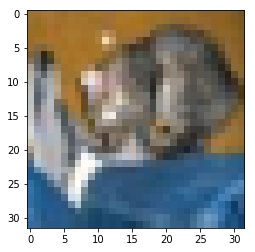

In [3]:
# script from my side: understand how image is loaded, transformed to Tensor and reshaped for displaying
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

tstdata = torchvision.datasets.CIFAR10(root='./data/', train=False)
tsttransform = transforms.Compose([transforms.ToTensor()])

img = tstdata[0][0]
img_tensor = tsttransform(img)
img_np = img_tensor.numpy()
plt.imshow(img_np.transpose((1,2,0)))
plt.show()

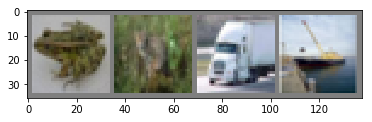

In [4]:
# show some more images
def imshow(img):
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg.transpose((1,2,0))) # when showing images, the third dimension is between 0 and 2 (RGB)
    
# get some random training images
dataiter = iter(trainloader)

images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

### 2. Define a Convolution NN

In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### 3. Define Loss function and optimizer

In [7]:
import torch.optim as optim

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

### 4. Train a network

In [12]:
for epoch in range(2):
    running_loss = 0
    for i, data in enumerate(trainloader,0):
        # get image and labels
        input, labels = data
        # Wrap them into Variables
        input, labels = Variable(input), Variable(labels)
    
        # zero the parameter gradient
        optimizer.zero_grad()
    
        # forward + backwards + optimize
        output = net.forward(input)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 1.172
[1,  4000] loss: 1.193
[1,  6000] loss: 1.176
[1,  8000] loss: 1.153
[1, 10000] loss: 1.168
[1, 12000] loss: 1.136
[2,  2000] loss: 1.075
[2,  4000] loss: 1.079
[2,  6000] loss: 1.106
[2,  8000] loss: 1.087
[2, 10000] loss: 1.085
[2, 12000] loss: 1.068


### 5. Test network on test data

Ground truth:  frog plane  bird   car


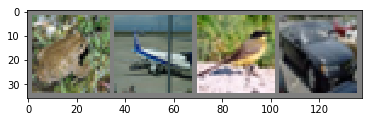

In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

print('Ground truth: ' + ' '.join('%5s' % classes[labels[j]]for j in range(4)) )

In [42]:
# the outputs are the energies of the classes: higher energy means higher prob of that class
output = net(Variable(images))
_, predicted = torch.max(output, 1)
print('Predicted: ' + ' '.join('%5s' % classes[predicted.data[j]]for j in range(4)) )

Predicted:  frog plane  deer   car


In [48]:
# predict on the full test dataset
correct = 0
total = 0
for data in testloader:
    images, labels = data
    output = net(Variable(images))
    _, predicted = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %
